# RNN과 CNN을 이용한 시퀸스 처리


- 순환 뉴런과 순환 층

- RNN 훈련하기

- 시계열 예측하기

- 긴 시퀸스 다루기


## 순환 뉴런과 순환 층


### 순환 신경망의 필요성


자연어, 주식과 같이 과거의 정보의 영향을 많이 받는 **시계열 데이터**를 예측할 때는 과거의 정보를 기억하고 있어야 한다.

이를 위해 **생성된 출력을 다시 입력으로** 사용하는 **순환 뉴런**을 사용한 **순환 신경망**을 사용한다.

이와 같은 순환신경망을 미래의 값을 **예측**하거나 과거 데이터에서 누락된 값을 예측하여 **값을 대체**하는데 사용할 수 있다.


### 순환 뉴런


순환뉴런은 아래와 같이 구성되어 있다. 그림과 같이 이전 뉴런의 출력을 다시 입력으로 받는 것을 확인할 수 있다.

<img src="https://blog.kakaocdn.net/dn/8XmLk/btrk7tVbY0C/kKNtn7aJMnz7suCzNkttA1/img.png">


이를 수식으로 나타내면 아래와 같이 표현할 수 있다.

- $W_x$: 현재 타임스텝의 입력에 대한 연결가중치 행렬

- $W_y$: 이전 타임스텝의 출력에 대한 연결가중치 행렬

$$\mathbf{y}_{(t)}=\phi\left(\mathbf{W}_x^T \mathbf{x}_{(t)}+\mathbf{W}_y{ }^T \mathbf{y}_{(t-1)}+\mathbf{b}\right)$$

수식에서 확인할 수 있듯 RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 가지고 있다.

이와 같이 결과값을 두번 사용하게 됨으로 값을 저장해 주어야 한다.(다시 계산하지 않기 위해서). 저장된 값을 **상태** 라고 하며 상태의 값을 저장하는 곳을 **메모리 셀** 또는 **RNN 셀** 이라고 한다.

> 이전 데이터의 정보를 기억해야 하기에 순환 식녕망은 피드포워드 신경망(순전파 계산) 뿐만 아니라 **뒤쪽으로 순환하는 연결**도 가지고 있다.


이에 바이어스(b)를 생략한 RNN 셀의 그림은 아래와 같이 나타낼 수 있으며, 이를 수식으로 나타내면 아래와 같다.

$$h_t = f(h_{t-1},x_t)$$

<img src="https://wikidocs.net/images/page/22886/rnn_image2_ver3.PNG">


### 순환 신경망 종류


순환 신경망은 입력과 출력되는 형태가 시계열인지, 벡터인지에 따라 크게 4가지로 구분할 수 있다.


<img src="https://img-blog.csdnimg.cn/7e810325a652427293ef2e8d5b2c7e73.png">


#### 시퀸스-투-벡터(Sequence-to-Vector, seq2vec)


기본적인 RNN 형태로 입력은 시퀸스이고 출력은 벡터인 형태이다.

영화 리뷰를 입력으로 받아 해당 리뷰가 긍정인지 부정인지를 판단하는 감성 분류(sentiment classification) 문제가 이에 해당한다.


#### 시퀸스-투-시퀸스(Sequence-to-Sequence, seq2seq)


Seq2Seq는 순차 데이터의 입력을 받은 뒤 Context vector를 통해 순차데이터를 출력하는 형태로 구성되어 있다.

주식가격과 같이 시계열 데이터 처리에 주로 사용된다.


#### 벡터-투-시퀸스(Vector-to-Sequence, vec2seq)


Vec2Seq는 입력으로 벡터를 받아 시퀸스를 출력하는 형태로 구성되어 있다.

이미지를 입력하여 캡션을 출력하는 이미지 캡셔닝(image captioning)이 이에 해당한다.


#### 인코더-디코더(Encoder-Decoder)


<img src="https://miro.medium.com/v2/1*Ismhi-muID5ooWf3ZIQFFg.png">

Seq2Vec를 통해 입력된 데이터를 Context vector를 생성하고 Vec2Seq를 통해 시계열 값을 출력하는 이중단계모델이다.

Seq2Seq 모델보다 성능이 뛰어나지만 Context vector를 생성하는 것이기에 문장의 마지막 단어에 영향을 많이 받는다.


### RNN의 역전파(BPTT)


RNN은 시계열 값을 담고 있는 메모리 셀을 가지고 있기 때문에, 타임 스텝을 통해 네트워크를 펼친 뒤, 역전파를 진행해야 한다. 이를 Backpropagation through time(BPTT)라고 한다.

> 타임 스텝을 진행한 뒤에 가중치가 전파됨으로 정방향 패스(계산)을 진행하는 동안에는 모두 동일한 가중치가 적용된다. 이를 **가중치 공유**라고 한다.


### 단변량 vs 다변량 시계열


타임스텝마다 하나의 값을 가지는 시퀸스를 **단변량 시계열**이라고 하며 타임스텝마다 여러개의 값을 가지는 시퀸스를 **다변량 시계열**이라고 한다.

예를 들어, 주식 가격을 예측하는 경우, 주식 가격만을 가지고 예측하는 경우는 단변량 시계열이며, 주식 가격, 거래량, 거래금액 등을 가지고 예측하는 경우는 다변량 시계열이다.


## Keras를 이용한 RNN 훈련하기


### 데이터셋 생성


Tensorflow의 Keras를 이용하여 RNN을 구현해보자.

타임스텝 50개의 길이를 가지는 3개의 단변량 시계열 데이터를 생성한 뒤 다음 시계열 값을 예측하고자 한다.

즉 아래와 같은 그래프에서 파랑색 점인 **Target**을 예측하고자 한다.


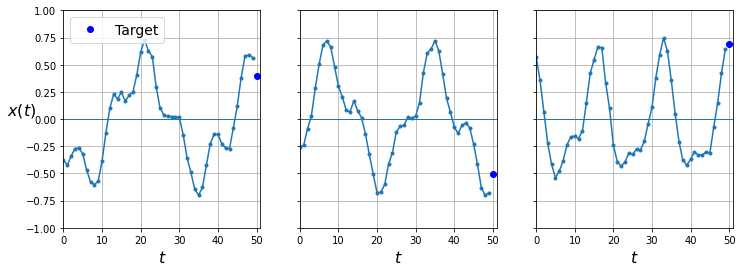

X_train.shape, y_train.shape: (7000, 50, 1) (7000, 1)


In [6]:
# create dataset
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os


def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # 웨이브 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # + 웨이브 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + 잡음
    return series[..., np.newaxis].astype(np.float32)


np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]


def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")


fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col == 0 else None),
                legend=(col == 0))
plt.show()

print("X_train.shape, y_train.shape: ", end="")
print(X_train.shape, y_train.shape)

### 단층 레이어


하나의 Dense 레이어를 가지는 모델과 하나의 RNN 레이어를 가지는 모델을 비교하여 보자.


#### Single Fully Connected Network


RNN 모델의 성능 비교를 위하여 기본적인 Fully Connected Network를 통해 예측을 진행해보자.


In [12]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

Epoch 1/20
 31/219 [===>..........................] - ETA: 0s - loss: 0.1689

2023-12-05 15:04:19.147764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


218/219 [============================>.] - ETA: 0s - loss: 0.0707

2023-12-05 15:04:20.040079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 1s 5ms/step - loss: 0.0706 - val_loss: 0.0296
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0189 - val_loss: 0.0128
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 11/2

0.003546461695805192

2023-12-05 14:55:20.846313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


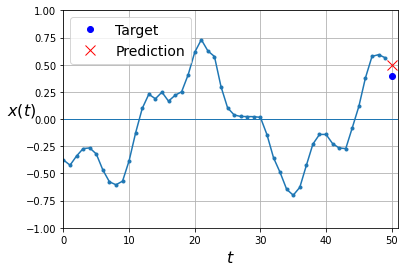

In [8]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

모델 학습 결과 훈련 데이터셋에 대하여 0.0036 loss값을, 검증 데이터셋에 대하여 0.0035의 loss값을 가지는 것을 확인할 수 있다.


#### Simgle RNN Network


이번엔 하나의 레이어만을 가지는 RNN 모델을 구성하여 예측을 진행해보자.


In [11]:
# SimpleRNN layer는 활성함수로 하이퍼볼릭 탄젠트 함수를 사용하며
# 모든 시계열 샘플에 데이터를 동시에 처리하는 특징을 가지고 있다.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### 모델 결과 비교


- 검증 세트에 대한 loss값(MSE)을 비교해보면, RNN 모델이 Fully Connected Network보다 더 높은 loss값을 가지는 것을 확인할 수 있다.

- Fully Connected Network는 51개의 파라미터를 가지는 반면 RNN 모델은 단 세 개의 파라미터만을 사용한 것을 확인할 수 있다.

  - RNN은 아래 3 개의 파라미터를 가지고 있다.

  - 순환층에서 순환 뉴런의 수를 지정하는 파라미터(unit)

  - 입력값에 대한 1개의 가중치

  - 편향값(bias)


### 심층 레이어


#### 심층 Fully Connected Network


In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### 심층 RNN Network


In [15]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

#### 결과 분석


2개 이상의 RNN셀을 연속적으로 쌓은 심층 RNN 모델이 심층 Fully Connected Network보다 더 높은 성능을 보여주는 것을 확인할 수 있다.


## 여러 타임스텝 예측


여러 타임스텝을 예측하기 위해서는 아래 두 방법을 사용할 수 있다.

1. 순차적 예측: 다음 타임스텝의 값을 예측한 뒤, 예측한 값을 입력으로 사용하여 다음 타임스텝의 값을 예측하는 방법

2. 동시 예측: n개의 타임스텝 값을 동시에 예측하는 방법


### 순차적 예측


순차적 예측 방법은 미래 예측이 반복될수록 정확도가 떨어지지만 구현이 간단하다는 장점이 있다.


In [ ]:
# 데이터 생성
np.random.seed(43)  # 42는 훈련 세트에 있는 첫 번째 시리즈를 반환하기 때문에 다른 값으로 지정합니다

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
Y_pred = X[:, n_steps:]

In [ ]:
# 예측한 값을 입력으로 사용하여 10개의 값을 예측
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)


def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead),
             Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead),
             Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)


plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### 동시 예측


Seq2Vec 모델을 통해 입력된 데이터를 Context vector를 생성하고 Vec2Seq를 통해 시계열 값을 출력하는 이중단계모델이다.


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# 한번에 10개의 타임스텝을 예측할 수 있도록 출력층의 노드를 10개로 수정한다.
# TimeDistributed층은 각 타임스텝마다 동일한 작업을 수행한다.
# 모든 레이어에 return_sequences=True를 지정하여 모든 타임스텝에 대한 출력을 얻을 수 있다.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.summary()

In [ ]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

## 긴 시퀸스 다루기


심층 RNN을 훈련시킬 때는 DNN과 마찬가지로 그래디언트 소실 문제가 발생할 수 있다. 이에 아래 두 문제를 해결하는 것은 심층 RNN의 주된 과제이다.

1. 기울기 소실 문제

2. 장기 기억 상실 문제


### 기울기 소실


기울기가 불안정하거나 소실되는 문제를 **기울기 소실**이라고 한다. 이를 해결하기 위해 배치 정규화를 많이 사용한다.

하지만 RNN 레이어에서는 배치 정규화를 사용하여 기울기 소실 문제를 해결할 수 없다. 이는 배치 정규화가 배치 차원을 기준으로 정규화를 진행하기 때문이다.

이에 전체 데이터셋을 기준으로 정규화를 진행하는 **층 정규화(Layer normalization)** 를 사용한다.

일반적인 배치 정규화는 아래와 같이 각 레이어 사이에 BatchNormaization 레이어를 추가하여 사용한다.


In [18]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

하지만 층 정규화를 수행하기 위해서는 **데이터가 활성함수에 입력되기 전에 정규화를 진행**해야 함으로 Layer 클래스를 상속받아 층 정규화를 진행하는 내용을 직접 추가해 주어야 한다.


In [ ]:
from tensorflow.keras.layers import LayerNormalization


class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = LayerNormalization()
        self.activation = keras.activations.get(activation)

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(inputs)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]


model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

### 장기 기억 상실 문제


층이 깊어질수록 RNN은 초반 데이터의 영향력이 소실되는 문제가 발생한다. 이를 **장기 기억 상실 문제**라고 한다.

> 단기 내용만 기억하기에 **단기 기억 문제**라고도 한다.

이를 해결하기 위해 장기 메모리를 가지는 셀이 연구되었다.


#### LSTM 셀


<img src="https://blog.kakaocdn.net/dn/rkT4o/btqSgL4a14Z/FfN3pXbpoSFzAlZKEzTTI0/img.jpg">

입력 게이트와 삭제 게이트를 활용하여 네트워크 내부에서 장기 상태에 저장할 것과 장기 상태에서 삭제할 것을 결정한다.

이를 통해 훈련이 빠르게 수렴하고 데이터에 있는 장기간의 의존성을 감지한다.

LSTM 레이어를 통해 구현할 수 있다.


In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.summary()

#### GRU 셀


<img src="https://www.researchgate.net/publication/319642918/figure/fig33/AS:631648458657812@1527608136275/Image-from-38-The-GRU-model-combines-the-forget-gate-and-input-gate-into-a-single.png">

핍홀 연결을 사용하여 LSTM보다 더 간단한 구조를 가지며 LSTM과 비슷한 성능을 보여준다.

하지만 제한적인 단기 기억을 가지기에 100 타임 스텝 이상의 시퀸스에서 장기 패턴을 학습하기 어렵다.


In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.summary()

#### 1D 합성곱 층


<img src="https://www.mdpi.com/sensors/sensors-20-02458/article_deploy/html/images/sensors-20-02458-g007.png">

스트라이드 2 이상의 합성곱 층을 사용하여 타임 스텝을 다운샘플링 하여 입력값을 처리한 뒤 GRU 셀을 활용하는 방법이다.

합성곱 층으로 시퀸스의 길이를 줄임을 통해 GRU 셀이 더 긴 시퀸스를 처리할 수 있게 된다.

이를 CNN-GRU 모델이라고 부른다.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.summary()

#### WAVENET


<img src="https://miro.medium.com/v2/resize:fit:1358/1*0TbaaX8l86ghbGEhuSjPzw.jpeg">

1D 합성곱 층을 쌓아 올려서 구성한 모델이다.

네트워크 층마다 각 뉴런의 입력이 떨어져 있는 간격인 **팽창 비율**을 2배씩 늘려가며 합성곱을 진행하여 하위 층은 단기 패턴을 학습하고, 상위 층은 장기 패턴을 학습하도록 구성한다.

이를 통해 네트워크는 단기 패턴과 장기 패턴을 모두 학습하여 긴 시퀸스를 효율적으로 처리할 수 있게 된다.


In [24]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[None, 1]),
    *[
        keras.layers.Conv1D(filters=20,
                            kernel_size=2,
                            padding="causal",
                            activation="relu",
                            dilation_rate=rate)
        for rate in (1, 2, 4, 8) * 2
    ],
    keras.layers.Conv1D(filters=10, kernel_size=1)
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 20)          60        
                                                                 
 conv1d_1 (Conv1D)           (None, None, 20)          820       
                                                                 
 conv1d_2 (Conv1D)           (None, None, 20)          820       
                                                                 
 conv1d_3 (Conv1D)           (None, None, 20)          820       
                                                                 
 conv1d_4 (Conv1D)           (None, None, 20)          820       
                                                                 
 conv1d_5 (Conv1D)           (None, None, 20)          820       
                                                                 
 conv1d_6 (Conv1D)           (None, None, 20)         